In [1]:
import tensorflow as tf

In [8]:
class Model:
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, inputs):
        return self.W * inputs + self.b

In [29]:
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [16]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

## Define a training loop

In [27]:
import matplotlib.pyplot as plt

In [33]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(outputs, model(inputs))
    dW, db = tape.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.89732
Epoch  1: W=4.60 b=0.39, loss=6.08946
Epoch  2: W=4.29 b=0.71, loss=4.28385
Epoch  3: W=4.03 b=0.96, loss=3.12270
Epoch  4: W=3.83 b=1.17, loss=2.37596
Epoch  5: W=3.67 b=1.33, loss=1.89571
Epoch  6: W=3.54 b=1.46, loss=1.58684
Epoch  7: W=3.44 b=1.57, loss=1.38818
Epoch  8: W=3.35 b=1.66, loss=1.26041
Epoch  9: W=3.29 b=1.73, loss=1.17822


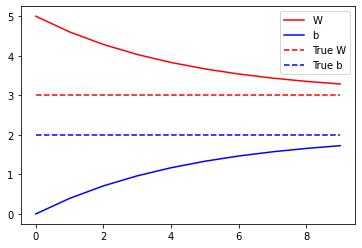

In [35]:
model = Model()
Ws, bs = [], []

for epoch in range(10):
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(outputs, model(inputs))
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch {:2d}: W={:1.2f} b={:1.2f}, loss={:2.5f}'.format(epoch, Ws[-1], bs[-1], current_loss))
    
plt.plot(range(10), Ws, 'r', range(10), bs, 'b')
plt.plot([TRUE_W] * 10, 'r--', [TRUE_b] * 10, 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()